In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

Кластеризуем школы

In [2]:
data_schools = 'data/data_schools.csv'
df = pd.read_csv(data_schools, low_memory=False)

Построим графики медианных значений по округам

In [3]:
median_by_login_and_region = df.groupby(
    ['District']
)[
    [
        'Average History Knowledge Index', 
        'Average Family Life Index', 
        'Average Culture Index'
    ]
].median().reset_index()
median_by_login_and_region

,District,Average History Knowledge Index,Average Family Life Index,Average Culture Index
0,Дальневосточный федеральный округ,1.829480,1.672316,1.943109
1,Приволжский федеральный округ,1.880741,1.891884,2.030922
2,Северо-Западный федеральный округ,1.892857,1.843750,2.120000
3,Сибирский федеральный округ,1.828571,1.826087,1.897638
4,Уральский федеральный округ,1.855469,1.764032,1.928813
5,Центральный федеральный округ,1.932203,1.820809,2.086957
6,Южный федеральный округ,1.875573,1.874586,1.996241


Добавим цвета для графиков

In [4]:
colors = ['#FF0000', '#FF4000', '#FF8000', '#FFBF00', '#FFFF00', '#80FF00', '#00FF00']

График медианных значений индекса истории

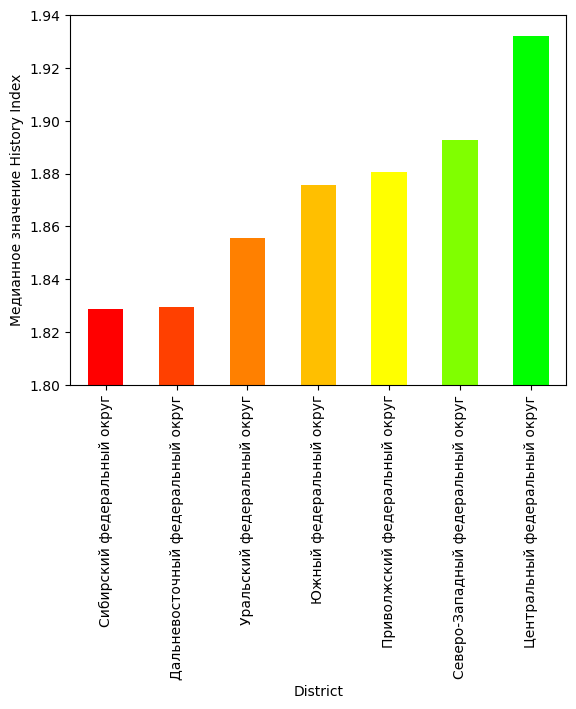

In [5]:
df_for_history_graphic = median_by_login_and_region.sort_values(
    by='Average History Knowledge Index', 
    ascending=True
)
history_ax = df_for_history_graphic.plot(
    kind='bar', 
    x='District', 
    y='Average History Knowledge Index', 
    legend=False, 
    color=colors
)

history_ax.set_ylim(1.8, 1.94) 
plt.ylabel('Медианное значение History Index')
plt.xlabel('District')
plt.show()

График медианных значений индекса культуры

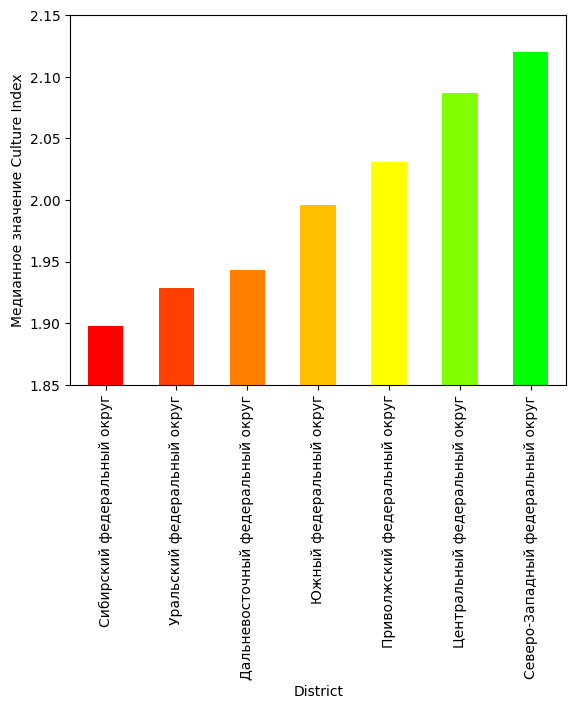

In [6]:
df_for_culture_graphic = median_by_login_and_region.sort_values(
    by='Average Culture Index', 
    ascending=True
)
history_ax = df_for_culture_graphic.plot(
    kind='bar', 
    x='District', 
    y='Average Culture Index', 
    legend=False, 
    color=colors
)
history_ax.set_ylim(1.85, 2.15) 
plt.ylabel('Медианное значение Culture Index')
plt.xlabel('District')
plt.show()

График медианных значений индекса семьи

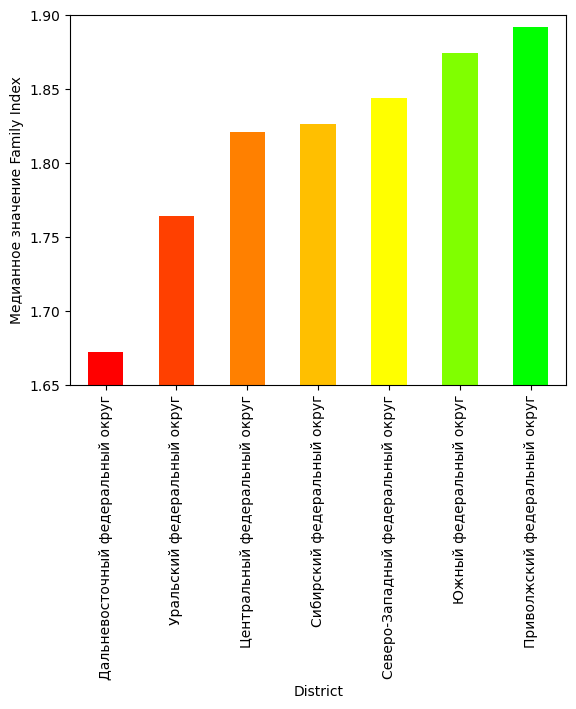

In [7]:
df_for_family_graphic = median_by_login_and_region.sort_values(
    by='Average Family Life Index', 
    ascending=True
)
history_ax = df_for_family_graphic.plot(
    kind='bar', 
    x='District', 
    y='Average Family Life Index', 
    legend=False, 
    color=colors
)
history_ax.set_ylim(1.65, 1.9) 
plt.ylabel('Медианное значение Family Index')
plt.xlabel('District')
plt.show()

Кластеризация

Сделаем scaled_df, применим z-нормализацию

In [8]:
scaled_df = (
    df[
        [
         'Логин_ОО',
         'Average History Knowledge Index', 'Average Culture Index', 'Average Family Life Index',
         'Отношение_неполных', 'Отношение_полных', 'Отношение_многодетных_полных',
         ]
    ]
)

columns_to_scale = [
    'Average History Knowledge Index', 'Average Family Life Index', 'Average Culture Index',
]

scaler = StandardScaler()

scaled_df[columns_to_scale] = scaler.fit_transform(
    scaled_df[columns_to_scale]
)
schools_df_scaled = pd.DataFrame(scaled_df)

scaled_df

C:\Users\vale4\AppData\Local\Temp\ipykernel_20108\504888666.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[columns_to_scale] = scaler.fit_transform(


,Логин_ОО,Average History Knowledge Index,Average Culture Index,Average Family Life Index,Отношение_неполных,Отношение_полных,Отношение_многодетных_полных
0,edu030331,-0.418703,-0.409992,-0.960908,0.090909,0.681818,0.227273
1,edu030343,0.612227,3.233993,0.107085,0.368421,0.631579,0.000000
2,edu033025,0.141427,0.967372,0.685268,0.120930,0.627907,0.251163
3,edu033029,-0.336746,0.191428,0.362002,0.175732,0.652720,0.171548
4,edu033057,-0.066482,-0.063704,0.174397,0.253623,0.557971,0.188406
...,...,...,...,...,...,...,...
438,edu786049,-0.297791,-0.033711,0.494129,0.000000,1.000000,0.000000
439,edu786089,1.646094,0.921464,0.826881,0.211538,0.711538,0.076923
440,edu790001,-0.107787,0.092996,-1.086107,0.275510,0.520408,0.204082
441,edu833004,0.111448,0.152018,-0.171377,0.147436,0.641026,0.211538


Посмотрим метод локтя

In [9]:
login_oo = scaled_df[['Логин_ОО']]
features = scaled_df.drop(['Логин_ОО'], axis=1)

D:\diploma\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\diploma\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


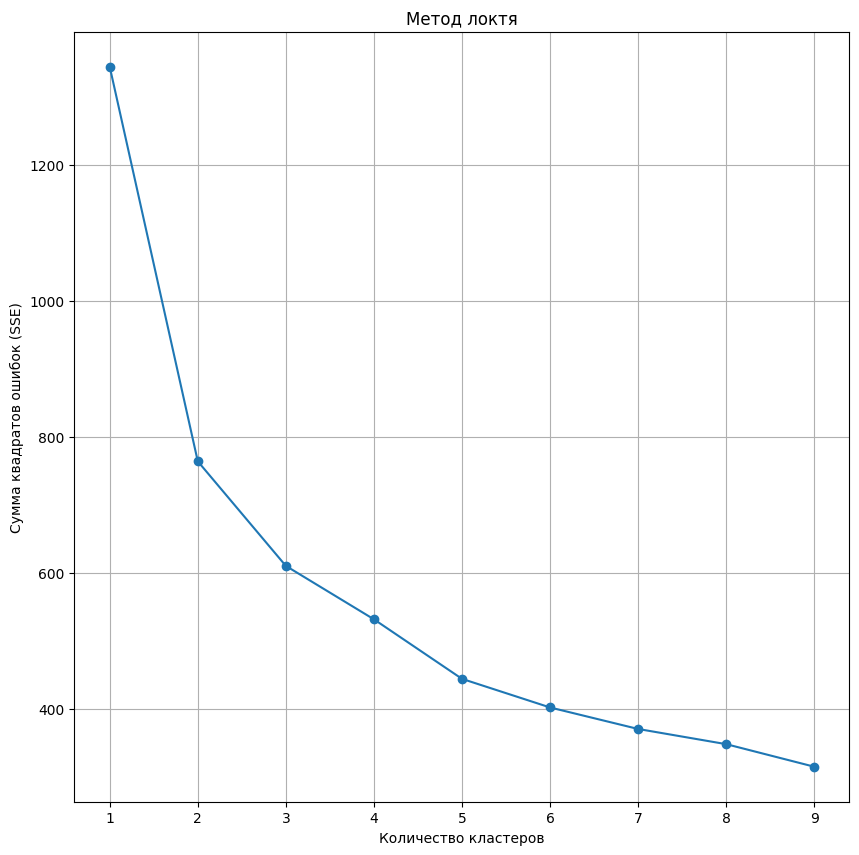

In [10]:
# Метод локтя для определения оптимального количества кластеров

n = 10
sse = []  # Список для хранения суммы квадратов ошибок
for k in range(1, n):  # Проверяем количество кластеров от 1 до 30
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)  # Добавляем сумму квадратов расстояний

plt.figure(figsize=(10, 10))
plt.plot(range(1, n), sse, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов ошибок (SSE)')
plt.xticks(range(1, n))
plt.grid(True)
plt.show()

Посмотрим TSNE

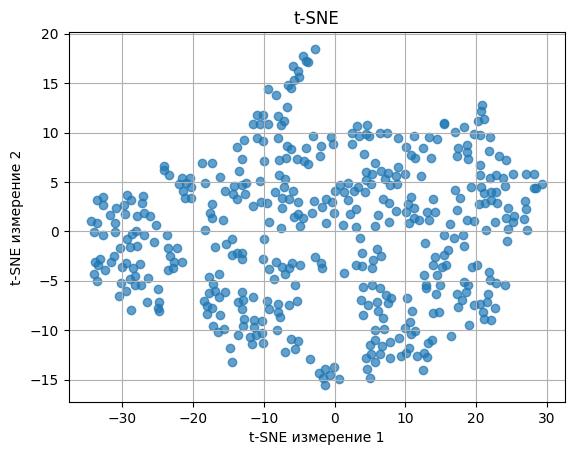

In [11]:
from sklearn.manifold import TSNE


# Преобразуем DataFrame в numpy массив
data = features.values  # если в датасете нет строковых лейблов

# Инициализация t-SNE
tsne = TSNE(n_components=2, random_state=0)  # n_components - размерность пространства после сокращения

# Применение t-SNE к данным
tsne_results = tsne.fit_transform(data)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.7)  # alpha - прозрачность точек на диаграмме

# Добавляем заголовок и метки осей
plt.title('t-SNE')
plt.xlabel('t-SNE измерение 1')
plt.ylabel('t-SNE измерение 2')

# Отображаем сетку на графике для лучшей читаемости
plt.grid(True)

plt.show()

Кластеризация KMeans

In [12]:
kmeans = KMeans(n_clusters=6, random_state=42)

# Обучаем модель и одновременно делаем предсказание
clusters_k_means = kmeans.fit_predict(features)
clustered_k_means_df = df.copy()
clustered_k_means_df['cluster'] = clusters_k_means
clustered_k_means_df  

,Логин_ОО,District,Region,Salary,Average History Knowledge Index,Average Culture Index,Average Family Life Index,Отношение_неполных,Отношение_полных,Отношение_многодетных_полных,Rus,Math,ПБ,cluster
0,edu030331,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.818182,1.909091,1.636364,0.090909,0.681818,0.227273,3.818182,3.727273,8.500000,3
1,edu030343,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.947368,2.789474,1.842105,0.368421,0.631579,0.000000,3.736842,3.578947,11.894737,4
2,edu033025,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.888372,2.241860,1.953488,0.120930,0.627907,0.251163,4.013953,4.237209,9.516279,2
3,edu033029,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.828452,2.054393,1.891213,0.175732,0.652720,0.171548,3.418410,3.460251,9.066946,5
4,edu033057,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.862319,1.992754,1.855072,0.253623,0.557971,0.188406,3.485507,3.550725,8.659420,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,edu786049,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,1.833333,2.000000,1.916667,0.000000,1.000000,0.000000,3.750000,3.750000,7.916667,5
439,edu786089,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,2.076923,2.230769,1.980769,0.211538,0.711538,0.076923,3.711538,3.903846,9.730769,2
440,edu790001,Дальневосточный федеральный округ,Еврейская автономная область,37565.3,1.857143,2.030612,1.612245,0.275510,0.520408,0.204082,3.448980,3.632653,8.969388,3
441,edu833004,Северо-Западный федеральный округ,Ненецкий автономный округ,86870.0,1.884615,2.044872,1.788462,0.147436,0.641026,0.211538,3.801282,3.846154,9.141026,1


In [13]:
data_k_means = 'data/data_k_means.csv'
clustered_k_means_df.to_csv(data_k_means, index=False)

Иерархическая кластеризация

In [14]:
# complete -- метод дальнего соседа
agglomerative = AgglomerativeClustering(n_clusters=6, linkage='complete')

# Обучаем модель и одновременно делаем предсказание
clusters_aggl = agglomerative.fit_predict(features)
clustered_k_aggl_df = df.copy()
clustered_k_aggl_df['cluster'] = clusters_aggl
clustered_k_aggl_df  

,Логин_ОО,District,Region,Salary,Average History Knowledge Index,Average Culture Index,Average Family Life Index,Отношение_неполных,Отношение_полных,Отношение_многодетных_полных,Rus,Math,ПБ,cluster
0,edu030331,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.818182,1.909091,1.636364,0.090909,0.681818,0.227273,3.818182,3.727273,8.500000,5
1,edu030343,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.947368,2.789474,1.842105,0.368421,0.631579,0.000000,3.736842,3.578947,11.894737,1
2,edu033025,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.888372,2.241860,1.953488,0.120930,0.627907,0.251163,4.013953,4.237209,9.516279,5
3,edu033029,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.828452,2.054393,1.891213,0.175732,0.652720,0.171548,3.418410,3.460251,9.066946,5
4,edu033057,Дальневосточный федеральный округ,Республика Бурятия,37297.2,1.862319,1.992754,1.855072,0.253623,0.557971,0.188406,3.485507,3.550725,8.659420,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,edu786049,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,1.833333,2.000000,1.916667,0.000000,1.000000,0.000000,3.750000,3.750000,7.916667,5
439,edu786089,Северо-Западный федеральный округ,г. Санкт-Петербург,59914.6,2.076923,2.230769,1.980769,0.211538,0.711538,0.076923,3.711538,3.903846,9.730769,1
440,edu790001,Дальневосточный федеральный округ,Еврейская автономная область,37565.3,1.857143,2.030612,1.612245,0.275510,0.520408,0.204082,3.448980,3.632653,8.969388,0
441,edu833004,Северо-Западный федеральный округ,Ненецкий автономный округ,86870.0,1.884615,2.044872,1.788462,0.147436,0.641026,0.211538,3.801282,3.846154,9.141026,5


In [15]:
data_aggl = 'data/data_agglomerative.csv'
clustered_k_aggl_df.to_csv(data_aggl, index=False)